# Dynamical Decoupling (DD) Simulation

Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [1]:
import numpy as np
import scipy
import math
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [2]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [3]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.1s for the first 10s.
for t in range (0,100,1):
    t = t/10
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)

    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = np.linalg.eig(difference)
    max_eigenvalue = eigenvalues.max()
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    #print(epsilon)
    #print(A)
    #print(B)
    time.append(t)


In [4]:
# simulating expression for the error matrix obtained from hand-calculation

error_matrix = []

for t in range(0,100,1):
    t = t/10
    E = -(math.sin(t*math.sqrt(1+lambda_value**2)))**2/math.sqrt(1+lambda_value**2) * (I*(1-lambda_value**2)+2*lambda_value*X*Z) + 0.5*I - 0.5*I*math.cos(2*t*math.sqrt(1+lambda_value**2))
    # get maximum eigen value
    eigenvalue,_ = np.linalg.eig(E)
    max_eigenvalues = eigenvalue.max()

    # add maximum eigen value to the array error_matrix
    error_matrix.append(max_eigenvalues)
    

## Graph t vs $\epsilon$

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


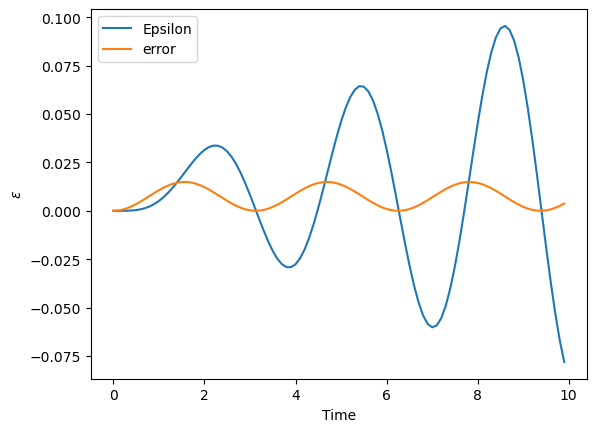

In [5]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")
plt.plot(time, error_matrix, label = "error")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.show()